In [8]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig



In [25]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=6, n_classes=3, n_informative=3, class_sep=3)

print(X.shape)

(1000, 6)


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)

X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1000, 3)


In [27]:
print(y[0])

1


In [28]:
print(fs.scores_)
print(fs.pvalues_)
print(fs.get_support())

[149.473482   138.77434413 631.55042462   1.35106868 138.30430994
  26.42495462]
[1.67804250e-057 6.75081010e-054 6.55871721e-178 2.59437073e-001
 9.75204133e-054 6.57082238e-012]
[ True  True  True False False False]


334


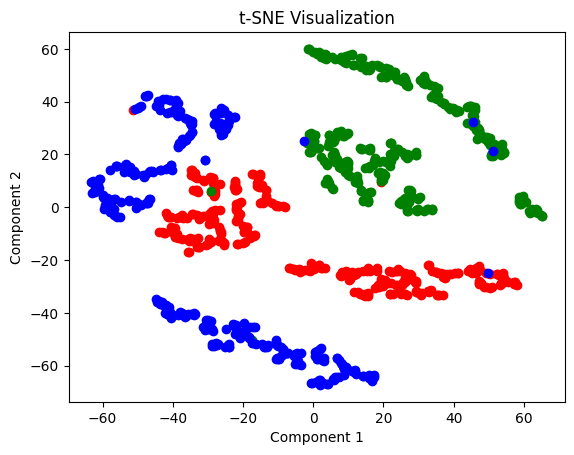

334


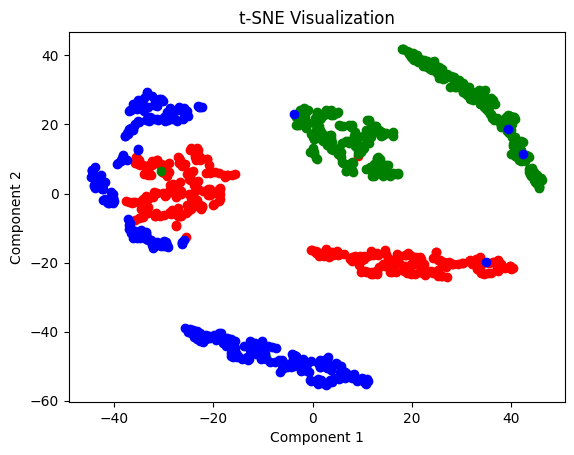

334


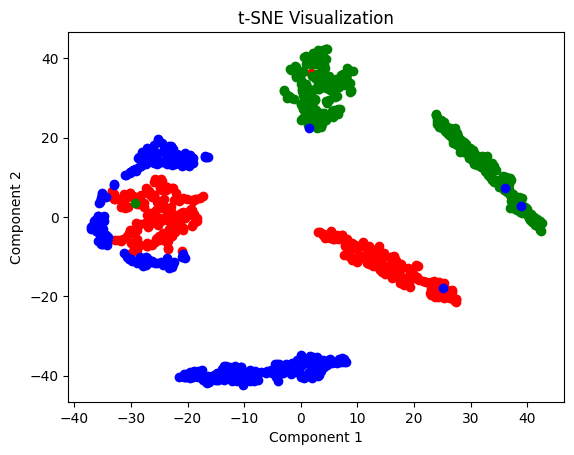

334


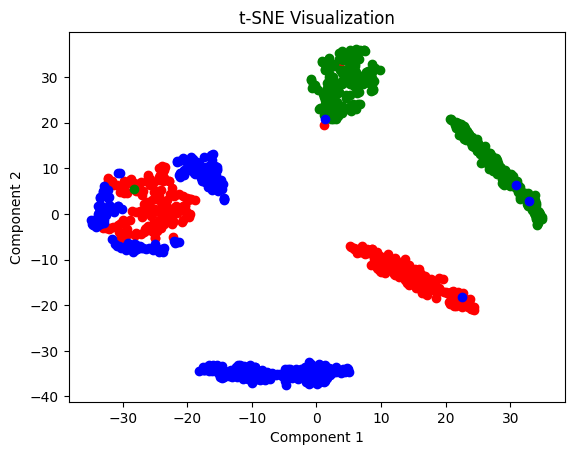

334


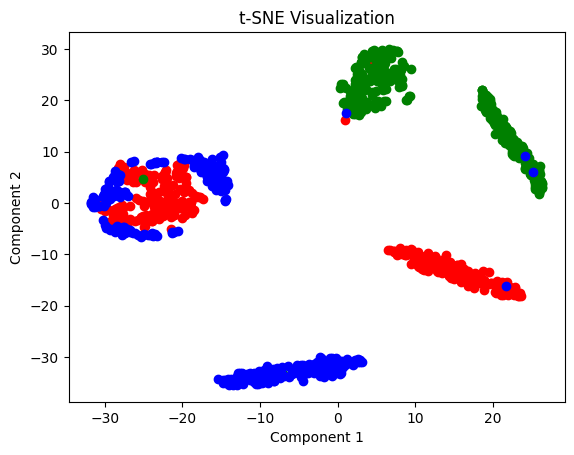

In [29]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt


for perplexity in range(10, 51, 10):
    # Применение t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_embedded = tsne.fit_transform(X_selected)
    
    X_embedded_by_class = [[] for _ in range(3)]
    
    for i, row in enumerate(X_embedded):
        class_label = y[i]
        X_embedded_by_class[class_label].append(row)

    print(len(X_embedded_by_class[0]))
    
    # Визуализация
    plt.figure('t-SNE Visualization')
    plt.title('t-SNE Visualization')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    colors = ['r', 'g', 'b']
    for i, x in enumerate(X_embedded_by_class):
        x = array(x)
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
    
    plt.show()

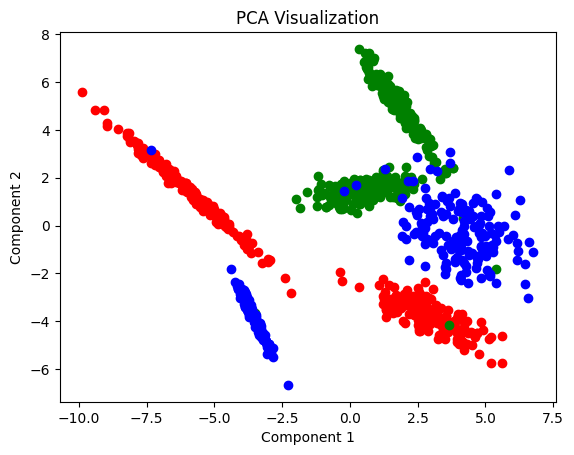

In [30]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X)

X_embedded_by_class = [[] for _ in range(3)]

for i, row in enumerate(X_embedded):
    X_embedded_by_class[y[i]].append(row)



# Визуализация
plt.figure('PCA Visualization')
plt.title('PCA Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

colors = ['r', 'g', 'b']
for i, x in enumerate(X_embedded_by_class):
    x = array(x)
    plt.scatter(x[:, 0], x[:, 1], c=colors[i])

plt.show()